- title: Занятие 10
- author: Dmitrii Kononov
- date: 2023-4-4
- status:
- test_link: 
- test_comment:     
- slug: s2_lab10
- ipynb_url: download/s2_lab10.ipynb

# Занятие 10: Минимальное остовное дерево.

## Цели работы
1. Минимальное остовное дерево, жадные алгоритмы.
2. Построение минимального остовного дерева: алгоритм Прима и алгоритм Крускала.

## Минимальное остовное дерево
От любой вершины связного графа, как от корня,  можно построить дерево, содержащее все остальные вершины – такое дерево называется **остовным деревом**.

Если граф является взвешенным, то от любой его вершины можно построить **минимальное остовное дерево** (*Minimum Spanning Tree (MST)*) – то есть остовное дерево с минимальной суммой весов ребер.
Задача построения минимального остовного дерева возникает, например, в случае необходимости построения сети асфальтированных дорог с минимальными затратами дорожного полотна и т.п. задачи.

Примерами алгоритмов нахождения минимального остовного дерева являются **Алгоритм Прима** и **Алгоритм Крускала (Краскала)**. 

Оба этих алгоритма относятся к **жадным** алгоритмам: решение о следующем шаге алгоритма принимается на основании наилучшего локального решения из всех возможных вариантов без учета всей структуры графа. Так как осуществляется поиск дерева с минимальным весом ребер, то на каждом шаге последовательно выбираются ребра с наименьшим весом. 

Граф может содержать несколькоминимальных остовных деревьев.

## Построение миниального остовного дерева
### Алгоритм Прима
Алгоритм Прима для постоения минимального остовного дерева начинает обход с одной вершины (`start`) и создает дерево, добавляя по одному ребру (добавляя одну новую вершину к дереву), пока не будут включены все вершины. Как было сказано выше, алгоритм Прима является *жадным* и выбирает на каждом шаге ребро с минимальным весом.
Пусть исходный граф `G`, для которого ищется минимальное остовное дерево, задан *матрицей смежности смежности* `G[i][j]`, $i, j \in [1, N]$. 

Псевдокод алгоритма Прима представлен ниже:
1. Выбираем произвольную вершину s = start, от которой необходимо построить дерево.
2. While(остаются не включенные в дерево вершины)
- находим ребро минимального веса между деревом и вершиной вне дерева;
- добавляем выбранное ребро и вершину в дерево;
- вычисляем новое значение веса ребер минимального остовного дерева;

Возможная реализация на языке `Python` алгоритма Прима выглядит следующим образом:
```python
INF = 10 ** 9 # задаем большое значение для инициализации начальных значений расстояний от вершин до дерева
distances = [INF] * N # инициируем массив расстояний до дерева, N – число вершин графа G
distances[start] = 0 # задаем расстояние до корня дерева start равным нулю 
intree = [False] * N # инициируем массив флагов принадлежности вершин к дереву 
weight = 0 # задаем начальное значение суммарного веса ребер минимального остовного дерева
for i in range(N): 
    min_distance = INF 
    # выберем очередную вершину u с минимальным расстоянием до дерева и добавим её к дереву
    for j in range(N): 
        if not intree[j] and distances[j] < min_distance: 
            min_distance = distances[j] 
            u = j 
    weight += min_distance
    intree[u] = True # отметим вершину u, как добавленную к дереву
    # пересчитаем минимальные расстояния до добавленной в дерево вершины u
    for v in range(N): 
        distances[v] = min(distances[v], G[u][v])
```
Асимптотическая сложность алгоритма Прима равна $O(N^2)$.

**Задание 1** Для графа, изображенного на рисунке ниже, найдите с помощью алгоритма Прима минимальное остовное дерево. В качестве результата необходимо продемонстрировать суммарный вес ребер найденного дерева, а также список ребер, вошедших в MST (по мере их добавления в MST).
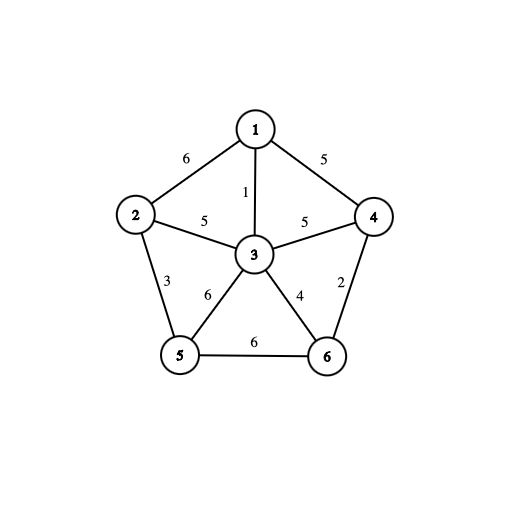

In [ ]:
INF = 10 ** 9 # задаем большое значение для инициализации начальных значений расстояний от вершин до дерева

N = 6
start = 0
G = [[INF] * N for _ in range(N)]

for a, b, s in [
    [0, 1, 6],
    [0, 2, 1],
    [0, 3, 5],
    [1, 2, 5],
    [1, 4, 3],
    [2, 3, 5],
    [2, 4, 6],
    [2, 5, 4],
    [3, 5, 2],
    [4, 5, 6],
]:
    G[a][b] = s
    G[b][a] = s


distances = [INF] * N # инициируем массив расстояний до дерева, N – число вершин графа G
distances[start] = 0 # задаем расстояние до корня дерева start равным нулю 
intree = [False] * N # инициируем массив флагов принадлежности вершин к дереву 
weight = 0 # задаем начальное значение суммарного веса ребер минимального остовного дерева
now = 0
for i in range(N): 
    min_distance = INF 
    # выберем очередную вершину u с минимальным расстоянием до дерева и добавим её к дереву
    for j in range(N): 
        if not intree[j] and distances[j] < min_distance: 
            min_distance = distances[j]
            u = j
    fr = None
    for i in range(N):
        if not intree[i]:
            if fr is None or G[u][fr] > G[u][i]:
                fr = i
    now += 1
    if now < N:
        print(fr, u)
    
    weight += min_distance
    intree[u] = True # отметим вершину u, как добавленную к дереву
    # пересчитаем минимальные расстояния до добавленной в дерево вершины u
    for v in range(N): 
        distances[v] = min(distances[v], G[u][v])

print(weight)

2 0
5 2
3 5
1 3
4 1
15


### Алгоритм Крускала
В алгоритме Крускала построение минимального остовного дерева начинается с графа, состоящего только из вершин исходного графа `G`. В начале исполнения алгорима, каждая вершина является отдельным компонентом будущего дерева. Алгоритм последовательно ищет ребро для добавления в расширяющийся лес путем поиска ребра с минимальным весом среди всех ребер, соединяющих два дерева в лесу. Если обе вершины рассматриваемого ребра принадлежат одному и тому же связному компоненту, то такое ребро отбрасывается – в противном случае образуется цикл. Если вершины находится в разных компонентах связности, ребро принимается и связывает две компоненты.

Псевдокод алгоритма Крускала представлен ниже:
1. Поместим все ребра `(v, w)` графа `G` в список, упорядоченный по неубыванию весов ребер.
2. While(не перебрали все ребра)
- рассматриваем следующее ребро (v, w);
- если вершины v и w принадлежат разным компонентам связности, то добавляем ребро (v, w) в дерево и объединяем копоненты связности вершин  v и w.

Пусть исходный граф `G` задан списком своих ребер. Возможная реализация на языке `Python` алгоритма Крускала выглядит следующим образом:
```python
N, M = map(int, input().split()) # cчитываем число вершин (N) и ребер (M) исходного графа
edges = [] # создаем список для хранения вершини их весов

# считываем вершины графа и их веса и заносим их в список edges
for i in range(M):
    start, end, weight = map(int, input().split())
    edges.append([weight, start, end])

edges.sort() # сортируем список ребер по неубыванию весов

comp = [i for i in range(N)] # создаем список, который хранит номера компонент связности для вершин

tree_weight = 0 # суммарный вес ребер минимального остовного дерева

# перебираем ребра
for weight, start, end in edges:
    if comp[start] != comp[end]: # проверка принадлежности вершин ребра-кандидата разным компонентам связности
        tree_weight += weight # увеличиваем суммарный вес ребер минимального остовного дерева
        # объединяем компоненты связности, соединенные ребром (start, end)
        a = comp[start]
        b = comp[end]
        for i in range(N):
            if comp[i] == b:
                comp[i] = a
```
Асимптотическая сложность алгоритма Крускала равна $O(M*log(M) + N^2)$.

**Задание 2** Для графа из *Задания 1* найдите с помощью алгоритма Крускала минимальное остовное дерево. В качестве результата необходимо продемонстрировать суммарный вес ребер найденного дерева, а также список ребер, вошедших в MST (по мере их добавления в MST).

In [12]:
INF = 10 ** 9 # задаем большое значение для инициализации начальных значений расстояний от вершин до дерева

N = 6
start = 5
G = [[INF] * N for _ in range(N)]

data = [
    [0, 1, 6],
    [0, 2, 1],
    [0, 3, 5],
    [1, 2, 5],
    [1, 4, 3],
    [2, 3, 5],
    [2, 4, 6],
    [2, 5, 4],
    [3, 5, 2],
    [4, 5, 6],
]


N, M = N, len(data)
edges = [] # создаем список для хранения вершини их весов

# считываем вершины графа и их веса и заносим их в список edges
for i in range(M):
    start, end, weight = data[i]
    edges.append([weight, start, end])

    end, start, weight = data[i]
    edges.append([weight, start, end])

edges.sort() # сортируем список ребер по неубыванию весов

comp = [i for i in range(N)] # создаем список, который хранит номера компонент связности для вершин

tree_weight = 0 # суммарный вес ребер минимального остовного дерева

# перебираем ребра
for weight, start, end in edges:
    if comp[start] != comp[end]: # проверка принадлежности вершин ребра-кандидата разным компонентам связности
        tree_weight += weight # увеличиваем суммарный вес ребер минимального остовного дерева
        # объединяем компоненты связности, соединенные ребром (start, end)
        a = comp[start]
        b = comp[end]
        for i in range(N):
            if comp[i] == b:
                comp[i] = a
        print(start, end)

print(tree_weight)

6 10
0 1 6
0 2 1
0 3 5
1 2 5
1 4 3
2 3 5
2 4 6
2 5 4
3 5 2
4 5 6
0 2
3 5
1 4
2 5
1 2
15


#### Система непересекающихся множеств
В случае с разреженным графом можно уменьшить асимптотическую сложность алгоритма Краскала до $O(M*log(M) + N*log(N))$ если использовать *систему непересекающихся множеств*.

Система непересекающихся множеств — это структура данных, которая хранит разбиение данных объектов на непересекающиеся множества и позволяет объединять два множества вместе. Основная идея системы непересекающихся множеств в том, что при слиянии двух множеств меньшее из двух множеств присоединяется к большему.

Для хранения системы непересекающихся множеств помимо массива `сomp`, как в рассмотренном выше примере, понадобятся еще один двумерный массив - список всех элементов, входящих в данное подмножество. В самом начале эти списки содержат ровно по одному элементу, так как все подмножества содержат по одному элементу. При объединении двух множеств нужно определить, какое из них меньше по размеру, все вершины, входящие в это множество, "перекрасить" в другой цвет, затем список вершин, входящих в меньшее множество, добавляется к списку вершин, входящих в большее множество и, затем, он очищается.

Поскольку при присоединении множества к большему множеству размер множества увеличивается как минимум в два раза, то каждая из `N` вершин будет перемещена в другое множество не более, чем $log_{2}N$ раз, поэтому общая сложность алгоритма будет $O(M*log(M) + N*log(N))$.